In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


Sample dataset

Data dictionary defines a time series dataset with three components (contains three key-value

pairs):

'Month: The time index or timestamps. 'Sales': The variable we want to forecast.

'AdvertisingSpend': An external variable that may impact the 'Sales' variable, used in the SARIMAX

model

In [2]:
data ={ 
    'Month':pd.date_range(start='2019-01-01',periods=36,freq='M'),
    'Sales':[100, 120, 130, 150, 200, 220, 250, 230, 210, 180, 160, 140, 110, 130,
             150, 190, 220, 240, 260, 250, 230, 208, 180, 160, 130, 140, 160, 190,
             210, 240, 270, 250, 230, 200, 210, 190],
    'AdvertisingSpend':[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160,
                        60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 70,
                        80, 90, 100, 110, 120, 130, 140, 150, 160, 70, 120, 90]
}
df=pd.DataFrame(data)
df.set_index('Month',inplace=True)

In [3]:
# Fit an ARIMA model to sales data
order=(2,1,1) #(p,d,q)order
model=ARIMA(df['Sales'],order=order)
results=model.fit()

#Forecast future sales values
forecast_steps=12
forecast=results.forecast(steps=forecast_steps)

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-i

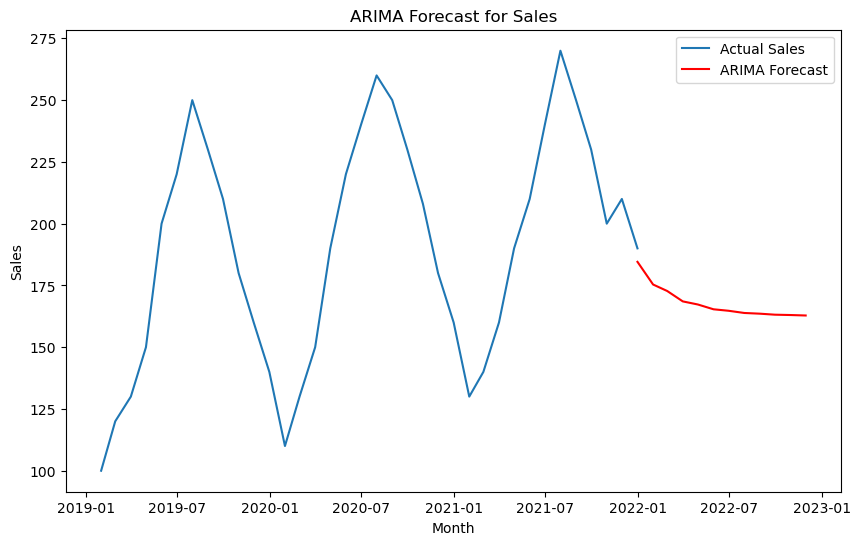

In [4]:
#Plot the original sales data and ARIMA forecast
plt.figure(figsize=(10,6))
plt.plot(df['Sales'],label='Actual Sales')
plt.plot(pd.date_range(start=df.index[-1],periods=forecast_steps,freq='M'),forecast,
        label='ARIMA Forecast',color='red')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("ARIMA Forecast for Sales")
plt.legend()
plt.show()

### Fit a SARIMAX model to the Sales data with AdvertisingSpend as an exogenous variable 

SARIMAX allows us to incorporate additional external factors (exogenous variables) that can influence the time series we are trying to forecast. In this case, we are using the 'AdvertisingSpend variable as an exogenous variable. If this variable has a significant impact on 'Sales, including it in the model can improve the accuracy of the forecast.

SARIMAX includes seasonal components (P, D, Q, s) that can capture seasonality in the data. If our data exhibits seasonal patterns (e.g., sales are higher during specific months of the year), SARIMAX can model and forecast these patterns more effectively.


SARIMAX allows us to specify both non-seasonal (p, d, q) and seasonal (P, D, Q, s) orders. This flexibility enables us to tailor the model to the specific characteristics of our data. In the provided code, we have chosen an order of (2, 1, 1) and seasonal order of (1, 1, 1, 12), which may better capture the data's behavior compared to the ARIMA order.

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
order=(2,1,1)    #(p,d,q) order
seasonal_order = (1,1,1,12)  #(P,D,Q,s) seasonal order
exog=df['AdvertisingSpend']

model=SARIMAX(df['Sales'],exog=exog,order=order,seasonal_order=seasonal_order)
results=model.fit()

#Forecast future sales values
forecast_steps=24
forecast=results.get_forecast(steps=forecast_steps,exog=df.iloc[-forecast_steps:]
                              ['AdvertisingSpend'])


/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarim

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.49664D+00    |proj g|=  1.55419D-01

At iterate    5    f=  2.45124D+00    |proj g|=  9.67272D-03

At iterate   10    f=  2.44548D+00    |proj g|=  2.67960D-02

At iterate   15    f=  2.43480D+00    |proj g|=  2.12174D-02

At iterate   20    f=  2.43175D+00    |proj g|=  2.36321D-02

At iterate   25    f=  2.42636D+00    |proj g|=  2.46441D-03

At iterate   30    f=  2.42634D+00    |proj g|=  5.33235D-03

At iterate   35    f=  2.42616D+00    |proj g|=  7.92983D-03

At iterate   40    f=  2.42611D+00    |proj g|=  1.07775D-03

At iterate   45    f=  2.42608D+00    |proj g|=  3.43041D-03

At iterate   50    f=  2.42608D+00    |proj g|=  1.14388D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


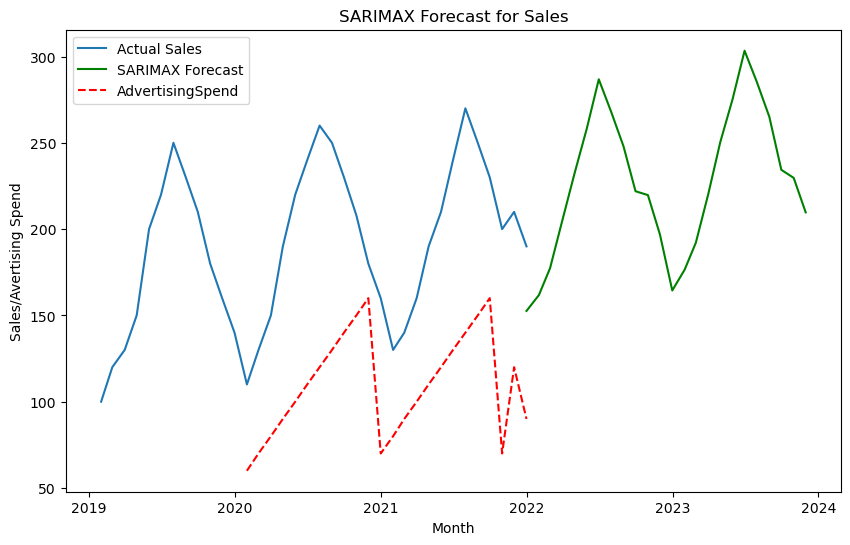

In [13]:
#PLot the original sales data, advertisingSpend and the SAR
plt.figure(figsize=(10,6))
plt.plot(df['Sales'],label='Actual Sales')
plt.plot(pd.date_range(start=df.index[-1],periods=forecast_steps,freq='M'),
         forecast.predicted_mean,label='SARIMAX Forecast',color='green')
plt.plot(df.index[-forecast_steps:],df['AdvertisingSpend'][-forecast_steps:],
        label='AdvertisingSpend',linestyle='--',color='red')
plt.xlabel("Month")
plt.ylabel("Sales/Avertising Spend")
plt.title("SARIMAX Forecast for Sales")
plt.legend()
plt.show()